In [19]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
gdpr_violations = pd.read_csv(r'C:\Users\USER\data_science\.github\export_GDPR_fines_cleaned.csv')
gdpr_violations

,Unnamed: 0,ID,Country,Date,Amount,Controller_Processor,Quoted_Art,Type,Art_,Art_10,...,Art_48,Art_5,Art_58,Art_6,Art_7,Art_8,Art_82,Art_88,Art_9,VIOLATED_ARTICLES
0,0,1542,ITALY,2022-11-10,20000,Sportitalia,5,Non-compliance with general data processing pr...,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1541,ITALY,2022-11-24,1000000,Areti spa,"5,12,15,24",Non-compliance with general data processing pr...,0,0,...,0,1,0,0,0,0,0,0,0,4
2,2,1540,ROMANIA,2022-12-27,3000,Kaufland Romania SCS,"29,32",Insufficient technical and organisational meas...,0,0,...,0,0,0,0,0,0,0,0,0,2
3,3,1539,ROMANIA,2022-12-22,10000,SUDREZIDENȚIAL Broker S.R.L.,32,Insufficient technical and organisational meas...,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,1538,ITALY,2022-11-10,4000,Villafranca di Verona municipality,"5,6,2-",Non-compliance with general data processing pr...,0,0,...,0,1,0,1,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537,1537,5,BELGIUM,2019-05-28,2000,Mayor,"5,6",Insufficient legal basis for data processing,0,0,...,0,1,0,1,0,0,0,0,0,2
1538,1538,4,AUSTRIA,2018-12-20,2200,Private person,"5,13",Insufficient legal basis for data processing,0,0,...,0,1,0,0,0,0,0,0,0,2
1539,1539,3,AUSTRIA,2018-09-27,300,Private car owner,"5,6",Insufficient legal basis for data processing,0,0,...,0,1,0,1,0,0,0,0,0,2
1540,1540,2,AUSTRIA,2018,1800,Kebab restaurant,"5,13,14",Insufficient legal basis for data processing,0,0,...,0,1,0,0,0,0,0,0,0,3


###  DATA CLEANING

In [21]:
# Remove the unncessary index column if it exists
if 'Unnamed: 0' in gdpr_violations.columns:
    gdpr_violations = gdpr_violations.drop('Unnamed: 0', axis=1)

In [31]:
# Convert Date to datetime, handling various formats
def parse_date(date_str):
    if len(str(date_str)) == 4 and str(date_str).isdigit():
        # If it's just a year, append "-01-01" to make it January 1st of that year
        return pd.to_datetime(f"{date_str}-01-01")
    else:
        # For other formats, let pandas infer the format
        return pd.to_datetime(date_str, format='mixed', errors='coerce')

gdpr_violations['Date'] = gdpr_violations['Date'].apply(parse_date)

# Check for any remaining NaT (Not a Time) values
#print(gdpr_violations['Date'].isna().sum())

In [ ]:
# Ensure Amount is numeric
gdpr_violations['Amount'] = pd.to_numeric(gdpr_violations['Amount'], errors='coerce')

In [ ]:
# Check for missing values
gdpr_violations.isnull().sum()

ID                       0
Country                  0
Date                    20
Amount                   0
Controller_Processor     0
                        ..
Art_8                    0
Art_82                   0
Art_88                   0
Art_9                    0
VIOLATED_ARTICLES        0
Length: 62, dtype: int64

In [ ]:
 # Handle missing values (example: fill with median)
gdpr_violations['Amount'].fillna(gdpr_violations['Amount'].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_23112\113326122.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdpr_violations['Amount'].fillna(gdpr_violations['Amount'].median(), inplace=True)


In [ ]:
# Standardize Country names
gdpr_violations['Country'] = gdpr_violations['Country'].str.title()
gdpr_violations['Country']

0         Italy
1         Italy
2       Romania
3       Romania
4         Italy
         ...   
1537    Belgium
1538    Austria
1539    Austria
1540    Austria
1541    Austria
Name: Country, Length: 1542, dtype: object

### Data Analysis & Visualization.

Time breakdown of total violations in the EU

C:\Users\USER\AppData\Local\Temp\ipykernel_23112\4123951543.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  violations_over_time = gdpr_violations.resample('M', on='Date').size()


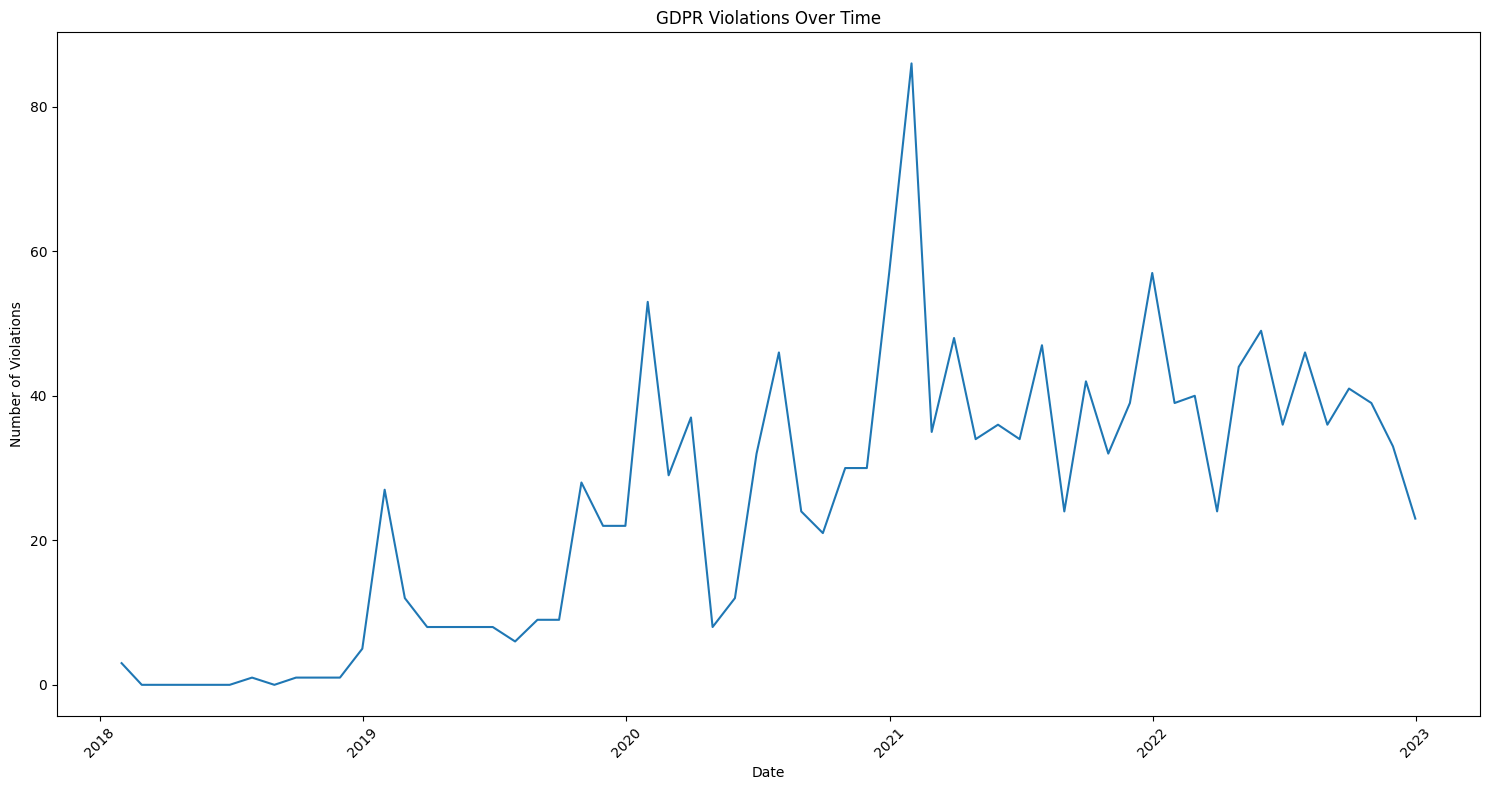

In [34]:
# Create a time series of violations
violations_over_time = gdpr_violations.resample('M', on='Date').size()

plt.figure(figsize=(15, 8))
sns.lineplot(x=violations_over_time.index, y=violations_over_time.values)
plt.title('GDPR Violations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most expensive violation by country,listing the specific violation type

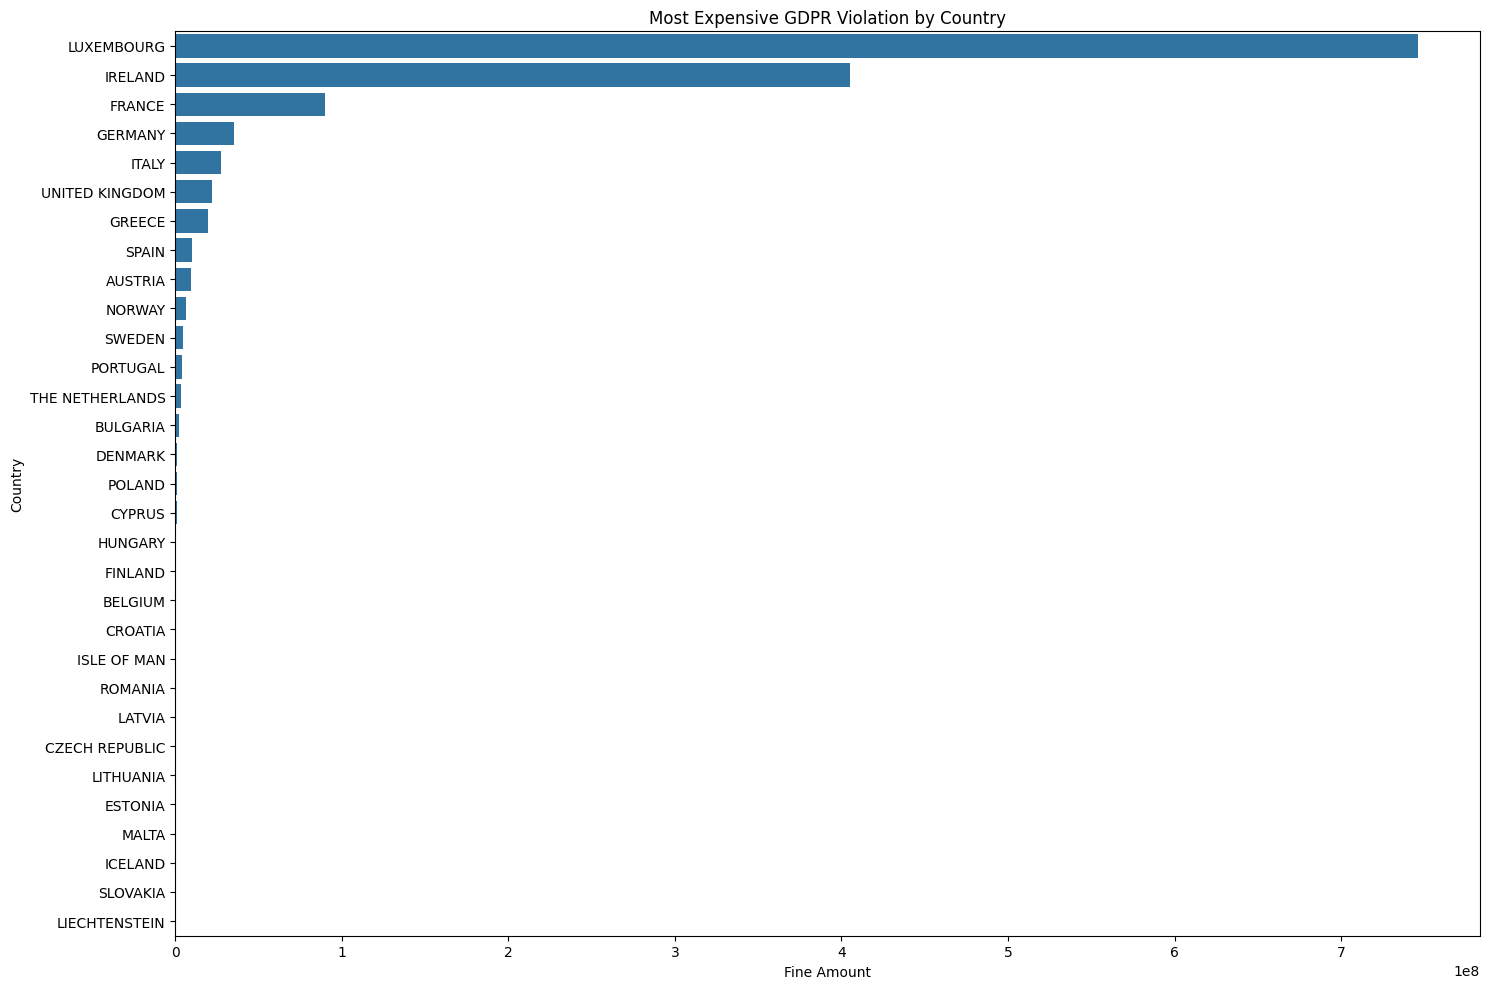

LUXEMBOURG: Non-compliance with general data processing principles - $746,000,000.00
IRELAND: Non-compliance with general data processing principles - $405,000,000.00
FRANCE: Insufficient legal basis for data processing - $90,000,000.00
GERMANY: Insufficient legal basis for data processing - $35,258,708.00
ITALY: Insufficient legal basis for data processing - $27,800,000.00
UNITED KINGDOM: Insufficient technical and organisational measures to ensure information security - $22,046,000.00
GREECE: Non-compliance with general data processing principles - $20,000,000.00
SPAIN: Insufficient legal basis for data processing - $10,000,000.00
AUSTRIA: Unknown - $9,500,000.00
NORWAY: Insufficient legal basis for data processing - $6,300,000.00
SWEDEN: Insufficient fulfilment of data subjects rights - $5,000,000.00
PORTUGAL: Non-compliance with general data processing principles - $4,300,000.00
THE NETHERLANDS: Non-compliance with general data processing principles - $3,700,000.00
BULGARIA: Insuff

In [35]:
# Group by country and find the max fine
most_expensive = gdpr_violations.loc[gdpr_violations.groupby('Country')['Amount'].idxmax()]

# Sort by fine amount
most_expensive = most_expensive.sort_values('Amount', ascending=False)

plt.figure(figsize=(15, 10))
sns.barplot(x='Amount', y='Country', data=most_expensive)
plt.title('Most Expensive GDPR Violation by Country')
plt.xlabel('Fine Amount')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# Print the violation types
for _, row in most_expensive.iterrows():
    print(f"{row['Country']}: {row['Type']} - ${row['Amount']:,.2f}")

Vodafone's GDPR violations in Volume

In [36]:
vodafone_violations = gdpr_violations[gdpr_violations['Controller_Processor'].str.contains('Vodafone', case=False, na=False)]
print(f"Total Vodafone violations: {len(vodafone_violations)}")

Total Vodafone violations: 71


Companies with the highest violations

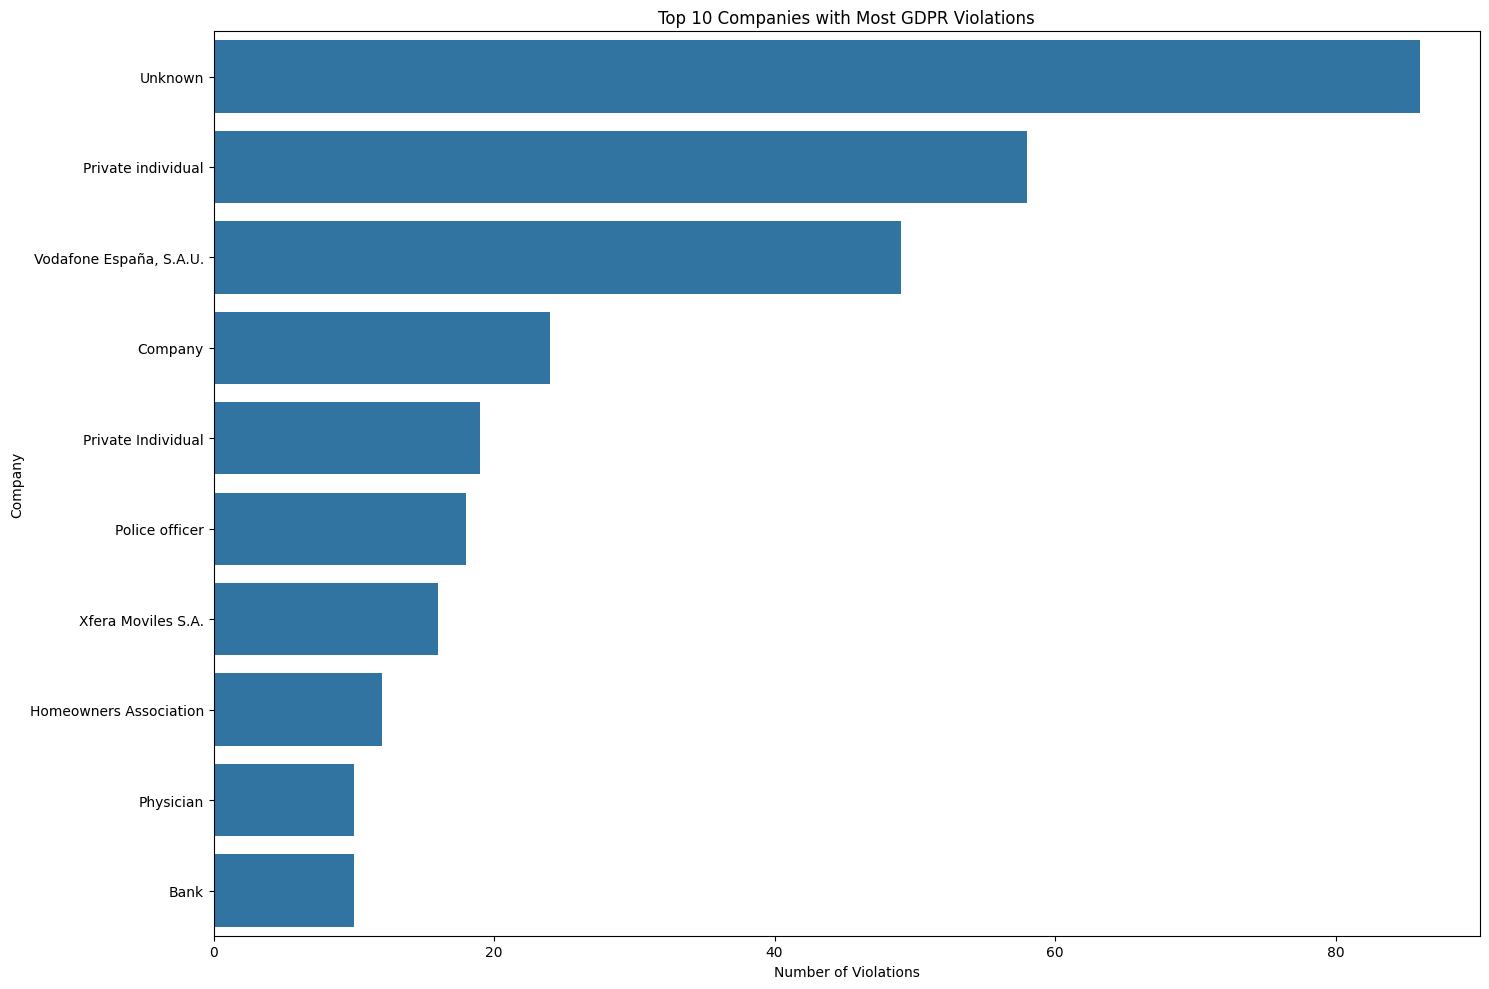

In [37]:
top_companies = gdpr_violations['Controller_Processor'].value_counts().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top 10 Companies with Most GDPR Violations')
plt.xlabel('Number of Violations')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

Distribution of fines levied per article

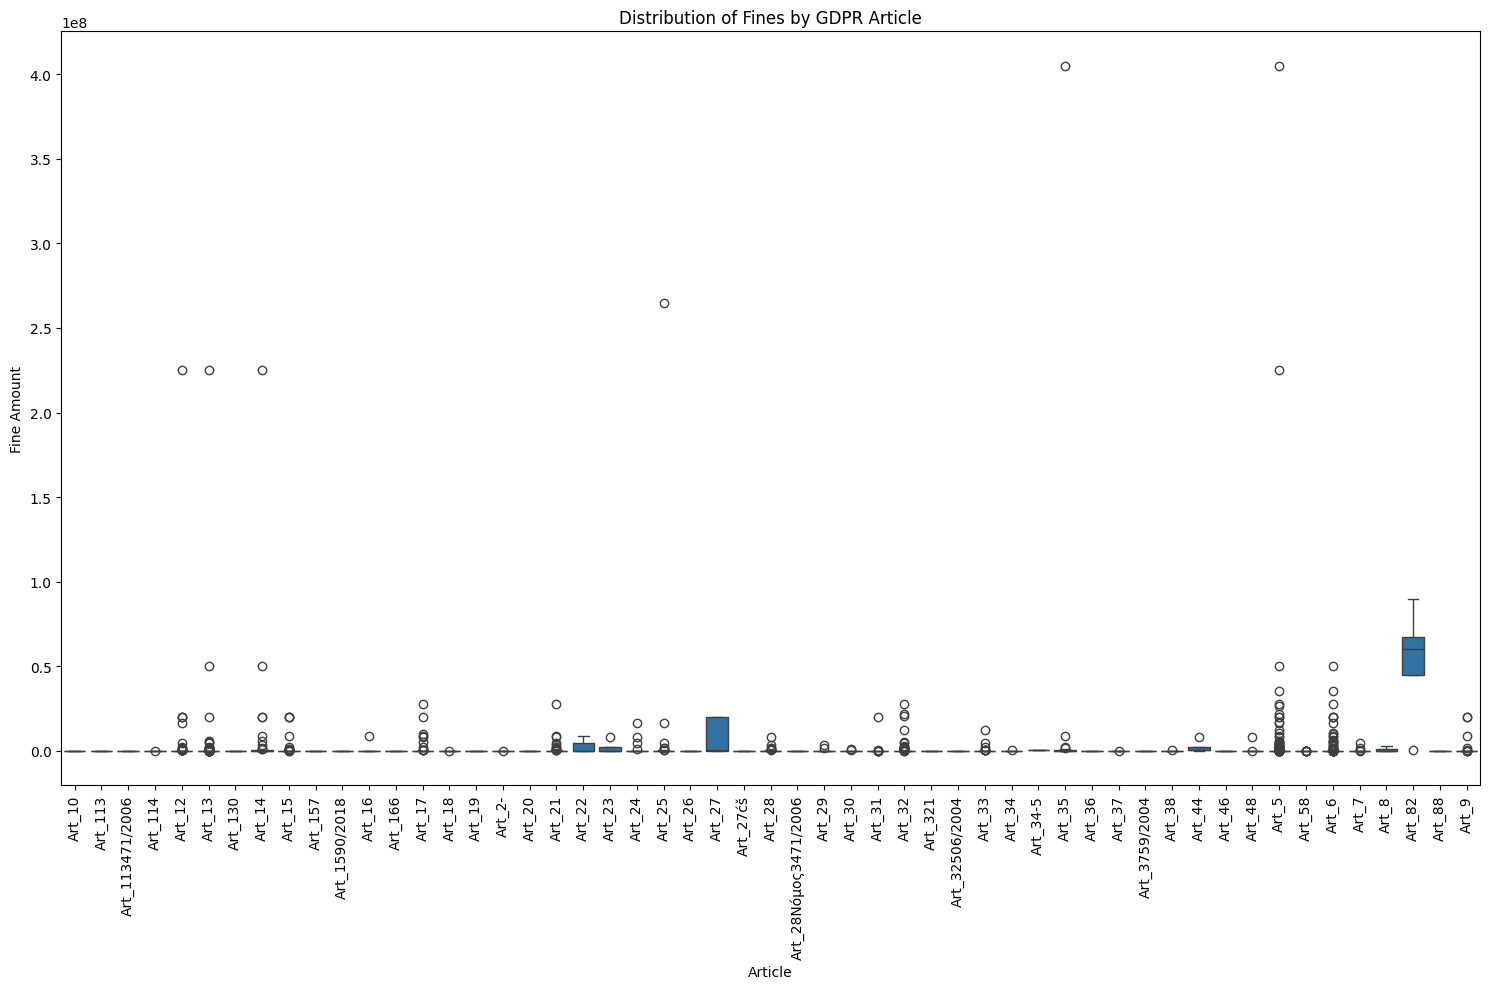

In [40]:
# Melt the dataframe to get article violations in long format
article_violations = pd.melt(gdpr_violations, 
                             id_vars=['Amount'], 
                             value_vars=[col for col in gdpr_violations.columns if col.startswith('Art_') and col != 'Art_'],
                             var_name='Article', 
                             value_name='Violated')

# Filter only violated articles
article_violations = article_violations[article_violations['Violated'] == 1]

# Create box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Article', y='Amount', data=article_violations)
plt.title('Distribution of Fines by GDPR Article')
plt.xlabel('Article')
plt.ylabel('Fine Amount')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 10 most violated articles

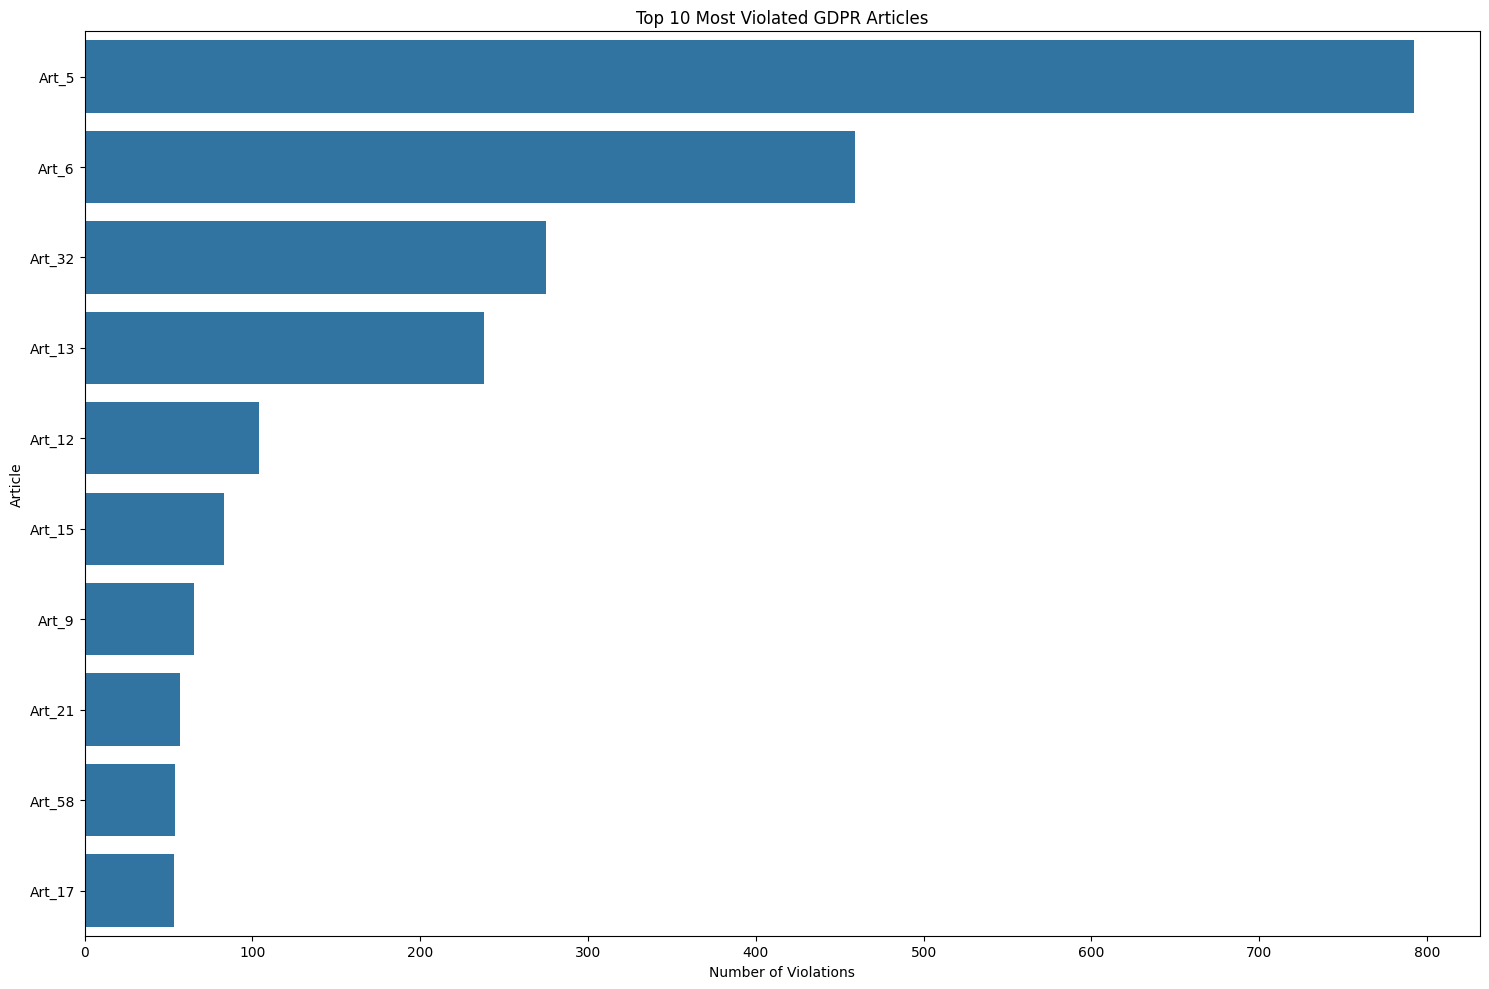

In [41]:
article_counts = article_violations['Article'].value_counts().head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x=article_counts.values, y=article_counts.index)
plt.title('Top 10 Most Violated GDPR Articles')
plt.xlabel('Number of Violations')
plt.ylabel('Article')
plt.tight_layout()
plt.show()

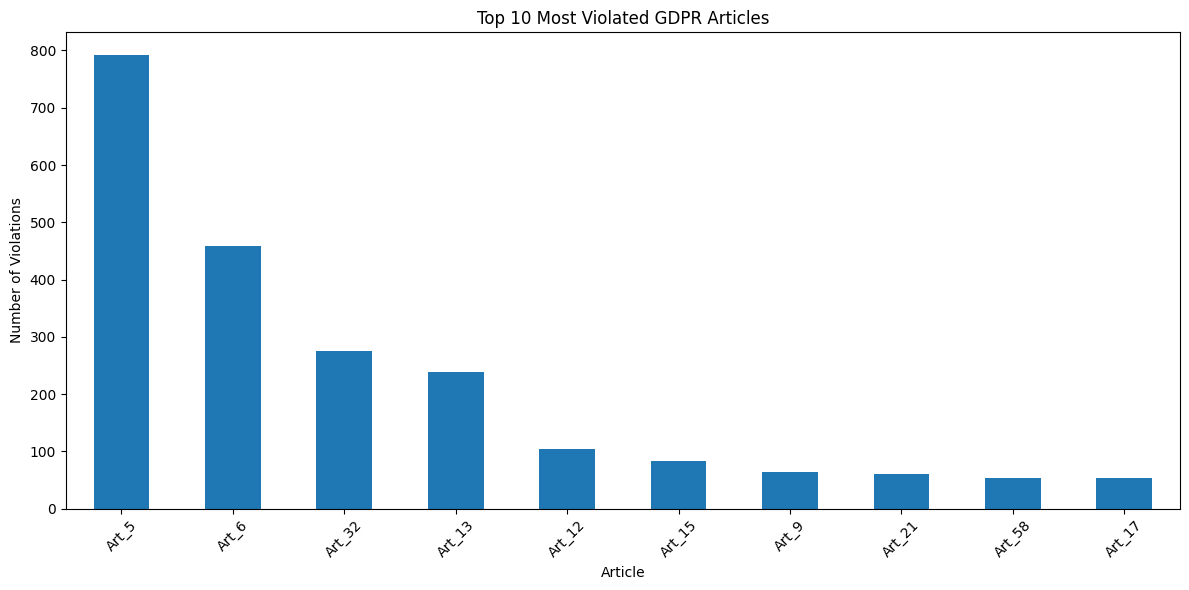

In [44]:
# When x-axis = Article and Y-axis = number of violations
article_columns = [col for col in gdpr_violations.columns if col.startswith('Art_') and col != 'Art_']
most_violated = gdpr_violations[article_columns].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
most_violated.plot(kind='bar')
plt.title('Top 10 Most Violated GDPR Articles')
plt.xlabel('Article')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

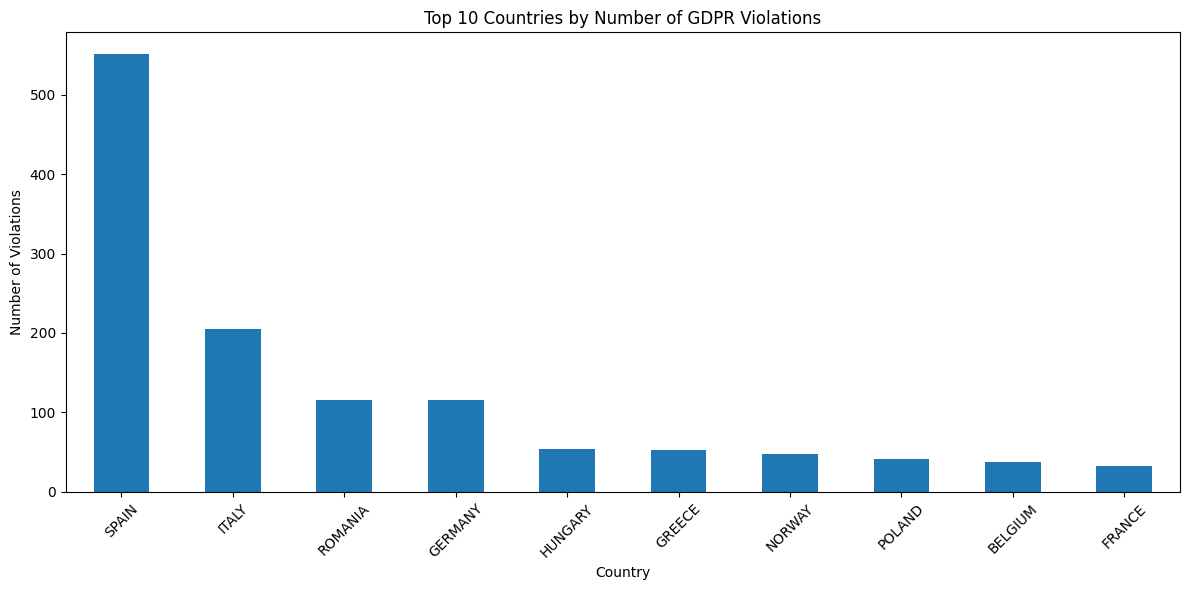

In [23]:
# Top 10 countries by number of violations
country_counts = gdpr_violations['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Top 10 Countries by Number of GDPR Violations')
plt.xlabel('Country')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Articles with the highest associated fine

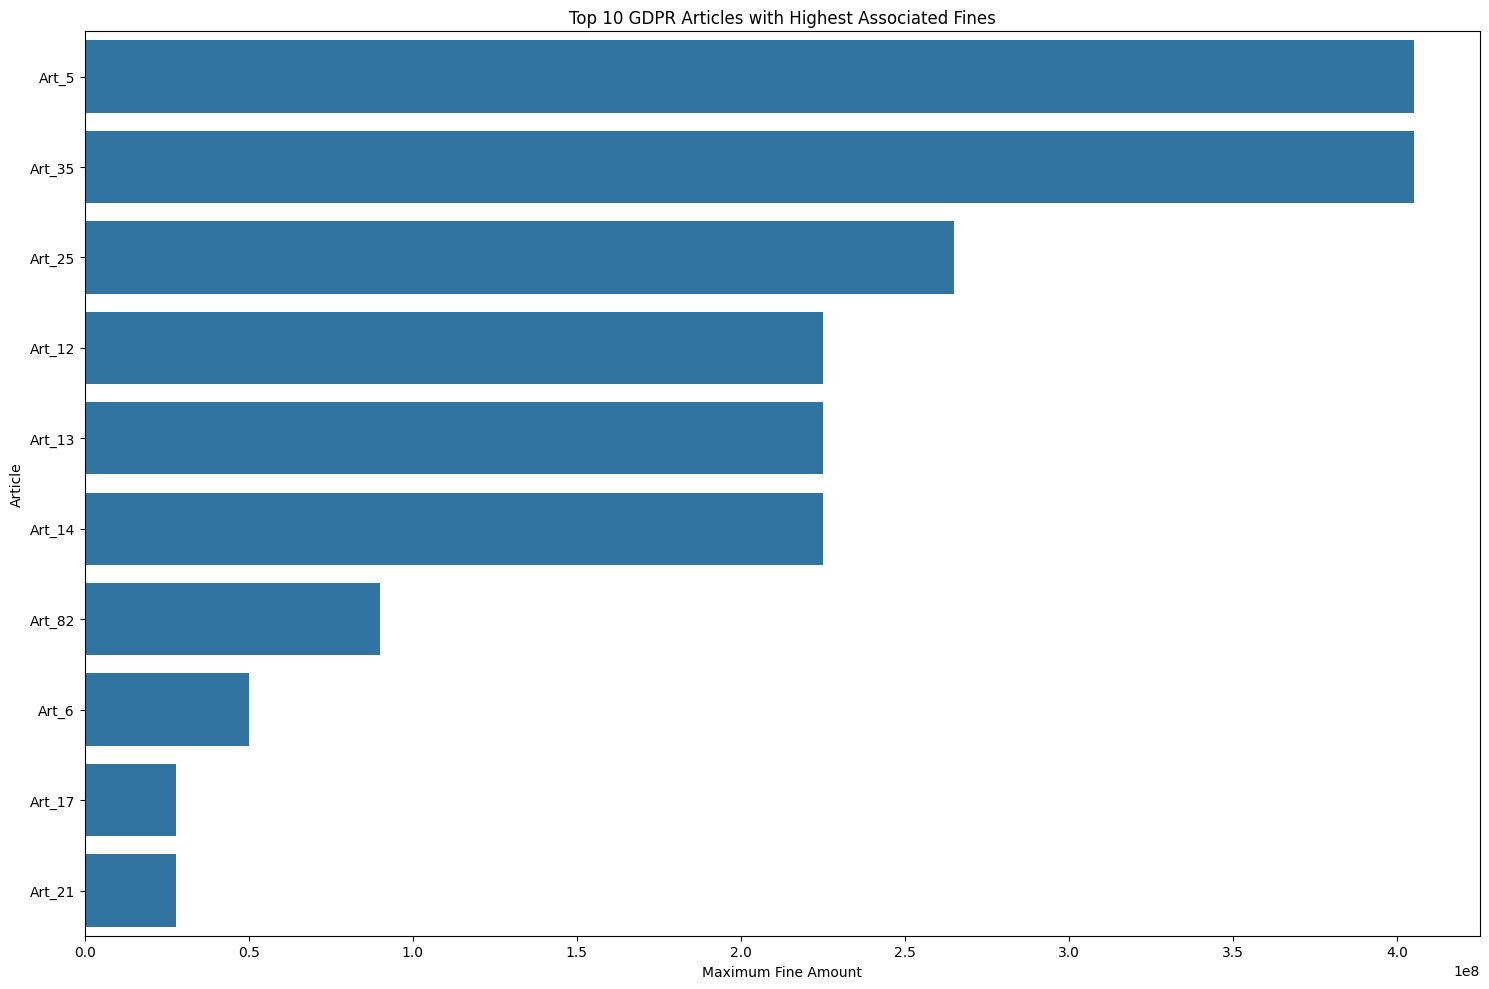

In [42]:
highest_fines = article_violations.groupby('Article')['Amount'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x=highest_fines.values, y=highest_fines.index)
plt.title('Top 10 GDPR Articles with Highest Associated Fines')
plt.xlabel('Maximum Fine Amount')
plt.ylabel('Article')
plt.tight_layout()
plt.show()

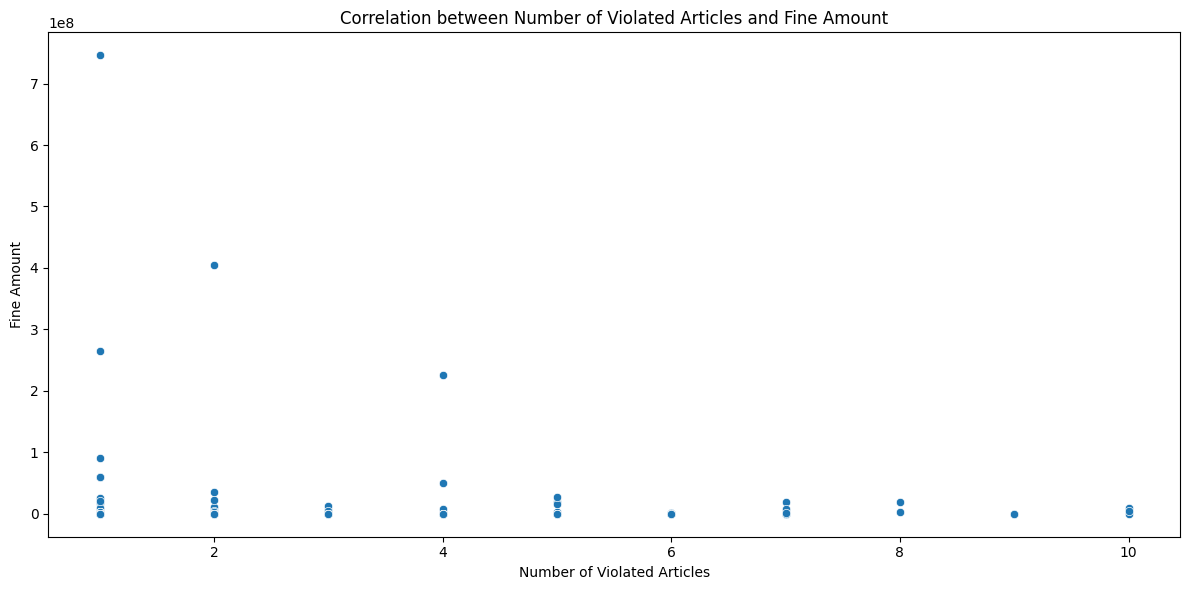

In [45]:
# Correlation between number of violated articles and fine amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='VIOLATED_ARTICLES', y='Amount', data=gdpr_violations)
plt.title('Correlation between Number of Violated Articles and Fine Amount')
plt.xlabel('Number of Violated Articles')
plt.ylabel('Fine Amount')
plt.tight_layout()
plt.show()

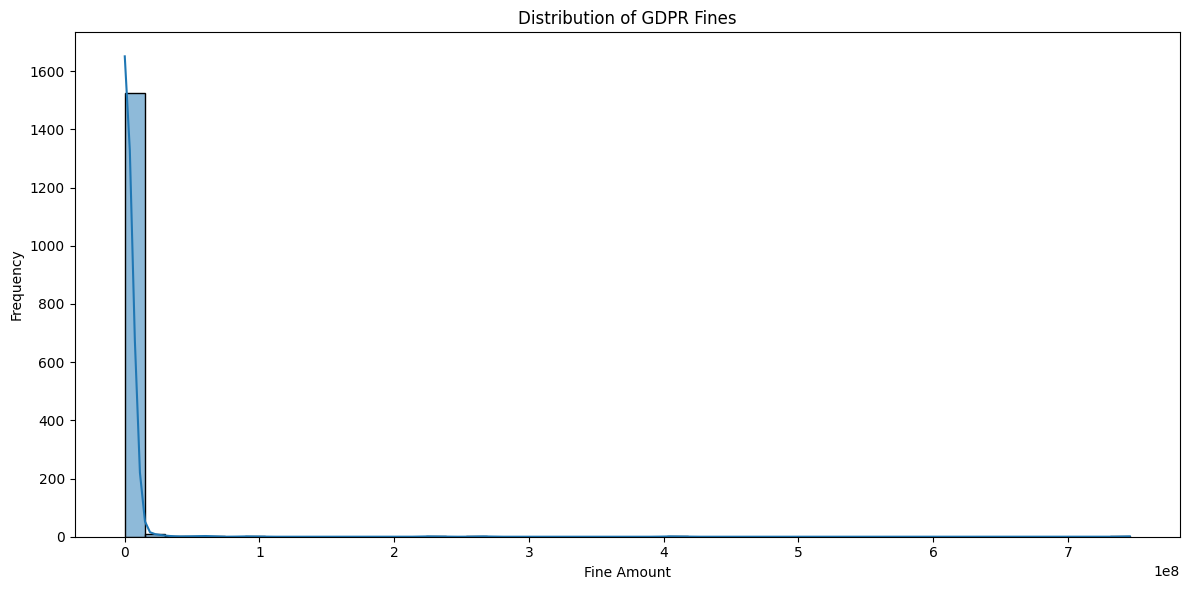

In [26]:
# Distribution of fine amounts
plt.figure(figsize=(12, 6))
sns.histplot(gdpr_violations['Amount'], bins=50, kde=True)
plt.title('Distribution of GDPR Fines')
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


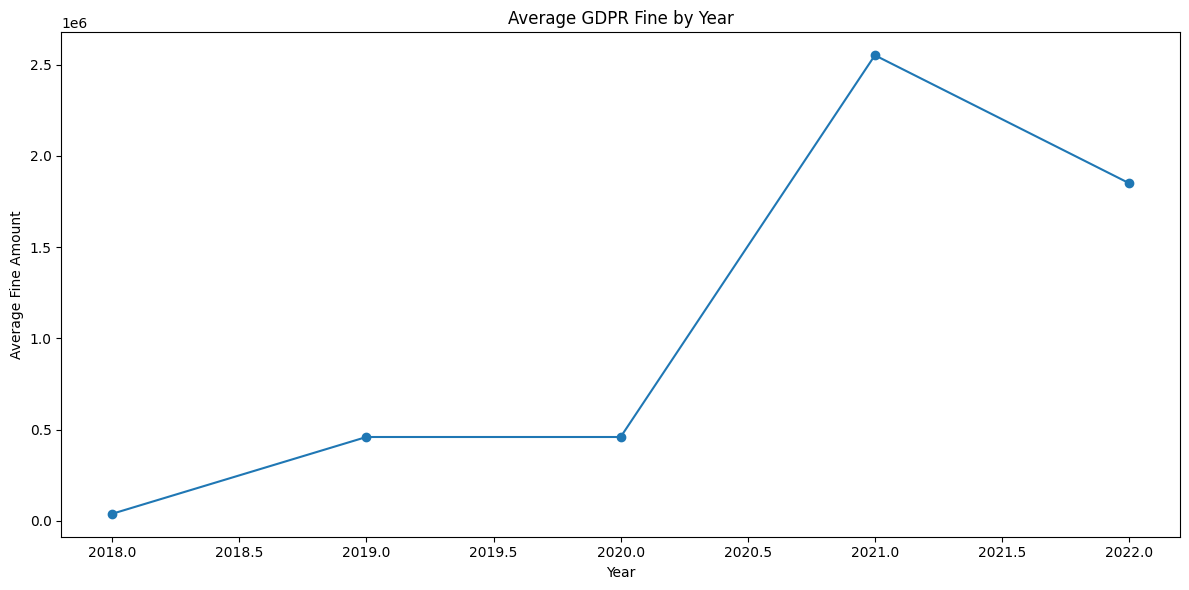

In [32]:
# Average fine by year
gdpr_violations['Year'] = gdpr_violations['Date'].dt.year
yearly_avg_fine = gdpr_violations.groupby('Year')['Amount'].mean()
plt.figure(figsize=(12, 6))
yearly_avg_fine.plot(kind='line', marker='o')
plt.title('Average GDPR Fine by Year')
plt.xlabel('Year')
plt.ylabel('Average Fine Amount')
plt.tight_layout()
plt.show()